<h1 style="font-size:30px;">Pre-Trained ImageNet Models in TensorFlow and Keras</h1>

In this notebook, we will learn how to use pre-trained models to perform image classification. We have already seen how we can train a simple neural network to classify images from the CIFAR-10 dataset, but this was a relatively simple task since there were only ten classes. On the other hand, classifying a larger number of object types will require much larger networks containing many millions of parameters. Thanks to the ImageNet project, pre-trained models are available in Keras that have been trained to detect objects from 1,000 different classes. With just a few lines of code, we will learn how to use these pre-trained models out-of-the-box to perform image classification with no training required.

<img src=https://learnopencv.com/wp-content/uploads/2023/01/tensorflow-keras-imagenet-pretrained-inception-v3-results-1.png width=1000 align='center'><br/>



## Table of Contents

* [1 ImageNet and ILSVRC](#1-ImageNet-and-ILSVRC)
* [2 Pre-Trained Models in Keras](#2-Pre-Trained-Models-in-Keras)
* [3 Read and Display Sample Images](#3-Read-and-Display-Sample-Images)
* [4 Pre-Trained Model Setup](#4-Pre-Trained-Model-Setup)
* [5 Make Predictions using the Pre-Trained Models](#5-Make-Predictions-using-the-Pre-Trained-Models)
* [6 Conclusion](#6-Conclusion)

## 1 ImageNet and ILSVRC
The [ImageNet](https://en.wikipedia.org/wiki/ImageNet) project is a large visual database designed for visual object recognition software research. The idea for this project was conceived over 15 years ago by AI researcher Fei-Fei Li. The ImageNet team presented their dataset for the first time in 2009.

Since 2010, the ImageNet project runs an annual software competition where research teams evaluate their computer vision algorithms for various visual recognition tasks such as Object Classification and Object Localization. The training data is a subset of ImageNet with 1.2 million images belonging to 1,000 [classes](https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/). Deep Learning came to the limelight in 2012 when Alex Krizhevsky and his team won the competition by a margin of a whopping 11%. ILSVRC and Imagenet are sometimes used interchangeably.

There are various subsets of the ImageNet dataset used in various contexts. One of the most highly used subsets of ImageNet is the "ImageNet Large Scale Visual Recognition Challenge ([ILSVRC](https://www.image-net.org/challenges/LSVRC/)) 2012-2017 image classification and localization dataset". This is also referred to in the research literature as ImageNet-1K or ILSVRC2017, reflecting the original ILSVRC challenge that involved 1,000 classes.

## 2 Pre-Trained Models in Keras
The winners of ILSVRC have been very generous in releasing their models to the open-source community. Many models are available in Keras, such as AlexNet, VGGNet, Inception, ResNet, Xception, and many more. Apart from the ILSVRC winners, many research groups also share their models, which they have trained for similar tasks, e.g., MobileNet, SqueezeNet, etc. All the models trained on ImageNet are for classifying images into one of 1,000 classes.

Keras comes bundled with many pre-trained classification models. As of Keras version 2.11, there are 19 different pre-trained models available, where some versions contain many variants as well. The list of models can be found [here](https://www.tensorflow.org/api_docs/python/tf/keras/applications). Here we will use the following pre-trained models to make predictions on several sample test images.

- VGG16
- ResNet50
- InceptionV3 

To use any of the pre-trained models in Keras, there are four basic steps required:

1. Load a pre-trained model
2. Preprocess the input image(s) using a dedicated pre-processing function that is accessible in the model, `preprocess_input()`
4. Call the model's `predict()` method to generate predictions
5. De-code the predictions using a dedicated post-processing function that is accessible in the model, `decode_predictions()`

### 2.1 Instantiate the Model

Here we will use the [ResNet50](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/ResNet50) model to describe the approach. Here we call the built-in model `ResNet50()` to instantiate the ResNet50 pre-trained model. Notice that the function has several optional arguments, which provide a lot of flexibility for using the model. However, the default settings allow you to use the model right out of the box to perform image classification from 1,000 classes in the ImageNet dataset.

```python
model_resnet50 = tf.keras.applications.resnet50.ResNet50(include_top=True, 
                                                         weights='imagenet', 
                                                         input_tensor=None,
                                                         input_shape=None, 
                                                         pooling=None, 
                                                         classes=1000,
                                                         classifier_activation='softmax',
                                                        )
```



### 2.2 Preprocess the Inputs
When these models were trained on the ImageNet dataset, the input images were preprocessed in a specific way. Besides resizing images to conform to the expected size of the network, the images are typically zero-centered and normalized. When using these models, it's important that your input images are pre-processed in the same way the training images were processed. For convenience, each model in Keras includes a dedicated pre-processing function [preprocess_input](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/preprocess_input). Here `x` represents a floating point `numpy.array` or a `tf.Tensor` containing the image data.

```python
tf.keras.applications.resnet50.preprocess_input(x, data_format=None)
```


### 2.3 Call the Model's `predict()` Method

After pre-processing the input images, we can then pass them to the model's `predict()` method as shown below. Because TensorFlow and Keras process image data in batches, we will need to add a batch dimension to the images, even if we process one image at a time. As an example, ResNet50 expects color images with a shape of `[224,224,3]`, but we must add a batch dimension so that the image batch has a shape: `[B, H, W, C]`, even if we intend to process a single image at a time. We'll see how this is done further below.


```python
preds = model_resnet50.predict(image_batch)
```

The predictions returned by the `predict()` method will contain the class probabilities for all 1,000 classes in a NumPy array. 

### 2.4 Decode the Predictions 

Fortunately, there is a convenience function available for decoding the predictions returned by the model. You can use the model-specific function [resnet50.decode_predictions](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/decode_predictions) or the [imagenet_utils](https://www.tensorflow.org/api_docs/python/tf/keras/applications/imagenet_utils/preprocess_input) version (both shown below), which will consolidate the top `k` predictions in descending order.

```python
decoded_preds = tf.keras.applications.resnet50.decode_predictions(
    preds, 
    top=5
)

```

```python
decoded_preds = tf.keras.applications.imagenet_utils.decode_predictions(
    preds, 
    top=5
)
```

These functions return a list of the top `k` (default = 5) predictions, along with the class IDs and class descriptions (names). This makes it easy to parse and report results.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import glob as glob
import os

## 3 Read and Display Sample Images

### 3.1 Read Sample Images

In [2]:
# Store all the image paths in a list.
image_paths = sorted(glob.glob('./images/*.png'))
print(image_paths)

['./images\\baseball-player.png', './images\\clown-fish.png', './images\\elephant.png', './images\\forklift.png', './images\\ice-cream.png', './images\\lemons.png', './images\\magnetic-compass.png', './images\\polar-bear.png']


### 3.2 Display Sample Images

Before moving on to the classification task, let's first display the eight sample images that we will use.

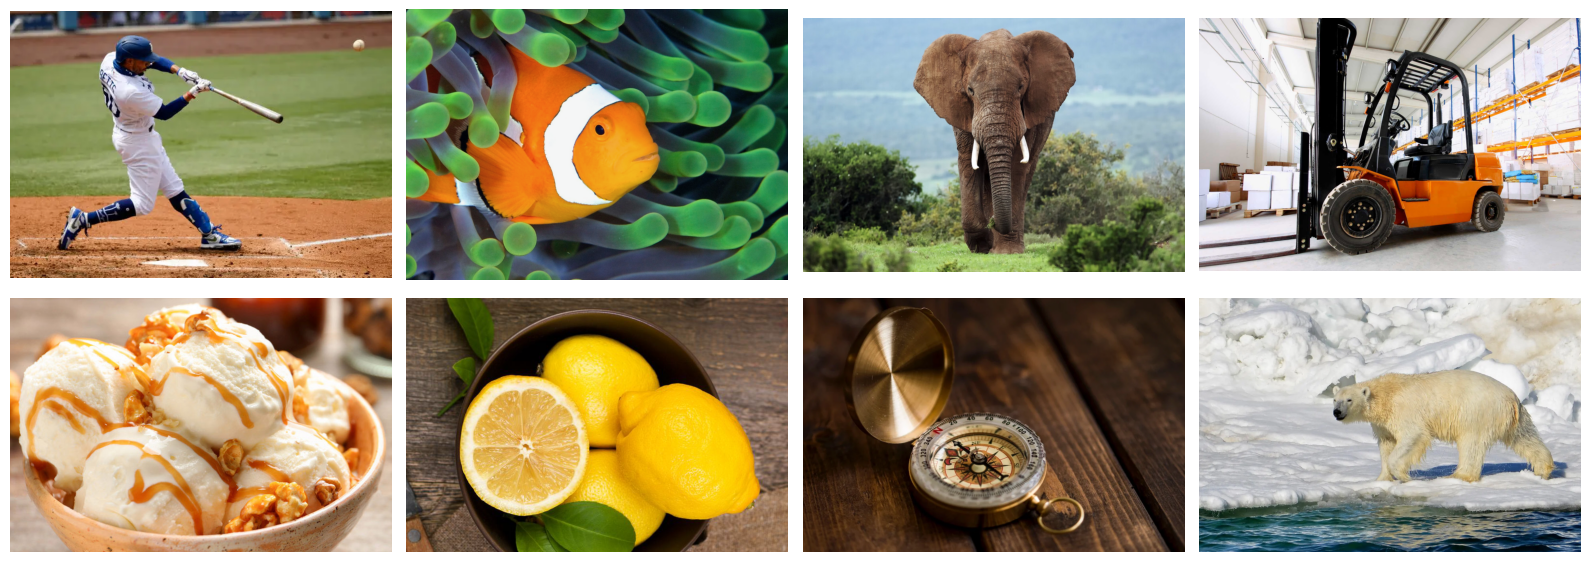

In [6]:
plt.figure(figsize=(16, 6))
for idx, image_path in enumerate(image_paths):
    image = plt.imread(image_path)
    plt.subplot(2,4,idx+1)
    plt.imshow(image)
    plt.axis('off')
    
plt.tight_layout()
plt.show()

## 4 Pre-Trained Model Setup 

We are now ready to load the models into memory and create a convenience function to implement the required processing.

### 4.1 Load the Models

Here we load each model into memory, and we display the input shape for each. 

In [7]:
model_vgg16        = tf.keras.applications.vgg16.VGG16()
model_resnet50     = tf.keras.applications.resnet50.ResNet50()
model_inception_v3 = tf.keras.applications.inception_v3.InceptionV3()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 48s 0us/step
102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step
96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [8]:
print(model_vgg16.input_shape)
print(model_resnet50.input_shape)
print(model_inception_v3.input_shape)

(None, 224, 224, 3)
(None, 224, 224, 3)
(None, 299, 299, 3)


The first (unspecified) dimension is the batch size, followed by the spatial size and the number of channels. When we process images using these models, we are free to specify the number of images in a batch, but the shape of each image must conform to the dimensions indicated above.

### 4.2 Create a Convenience Function for Batch Processing

Since we are using the Keras API, there is very little code required to use the models. For convenience, we will create a function that will automate the processing steps required for processing each image.

1. Read the images
2. Perform the required pre-processing for the images as required by the model
3. Add a batch dimension to the image tensor
4. Call the model's predict() method to make predictions
5. Decode the predictions to find the class name and confidence score for the top-k predictions
6. Display the results

In [9]:
def process_images(model, image_paths, size, preprocess_input, display_top_k=False, top_k=2):
    
    plt.figure(figsize=(20,7))
    for idx, image_path in enumerate(image_paths):
    
        # Read the image using TensorFlow.
        tf_image = tf.io.read_file(image_path)

        # Decode the above `tf_image` from a Bytes string to a numeric Tensor.
        decoded_image = tf.image.decode_image(tf_image)

        # Resize the image to the spatial size required by the model.
        image_resized = tf.image.resize(decoded_image, size)

        # Add a batch dimension to the first axis (required). 
        image_batch = tf.expand_dims(image_resized, axis=0)

        # Pre-process the input image.
        image_batch = preprocess_input(image_batch)

        # Forward pass through the model to make predictions.
        preds = model.predict(image_batch)

        # Decode (and rank the top-k) predictions. 
        # Returns a list of tuples: (class ID, class description, probability)
        decoded_preds = tf.keras.applications.imagenet_utils.decode_predictions(
            preds=preds,
            top=5
        )
        
        if display_top_k == True:
            for jdx in range(top_k):
                print("Top {} predicted class:   Pr(Class={:20} [index={:4}]) = {:5.2f}".format(
                    jdx + 1, decoded_preds[0][jdx][1], jdx, decoded_preds[0][jdx][2] * 100))
    
        plt.subplot(2,4,idx+1)
        plt.imshow(decoded_image)
        plt.axis('off')
        label = decoded_preds[0][0][1]
        score = decoded_preds[0][0][2] * 100
        title = label + ' ' + str('{:.2f}%'.format(score))
        plt.title(title, fontsize=16)

## 5 Make Predictions using the Pre-Trained Models

We are now ready to make predictions using the function defined above.

### 5.1 VGG-16

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Top 1 predicted class:   Pr(Class=ballplayer           [index=   0]) = 50.61
Top 2 predicted class:   Pr(Class=baseball             [index=   1]) = 49.39
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Top 1 predicted class:   Pr(Class=anemone_fish         [index=   0]) = 97.65
Top 2 predicted class:   Pr(Class=sea_anemone          [index=   1]) =  2.21
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 942ms/step
Top 1 predicted class:   Pr(Class=African_elephant     [index=   0]) = 52.34
Top 2 predicted class:   Pr(Class=Arabian_camel        [index=   1]) = 32.74
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 763ms/step
Top 1 predicted class:   Pr(Class=forklift             [index=   0]) = 98.88
Top 2 predicted class:   Pr(Class=crane                [index=   1]) =  0.59
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step
Top 1 predicted class:   Pr(Class=ice_cream            [index=   0]) = 96.31
Top 2 predicted class:   Pr(Class=chocolate_sauce      [index=   1]) =  2.41
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step
To

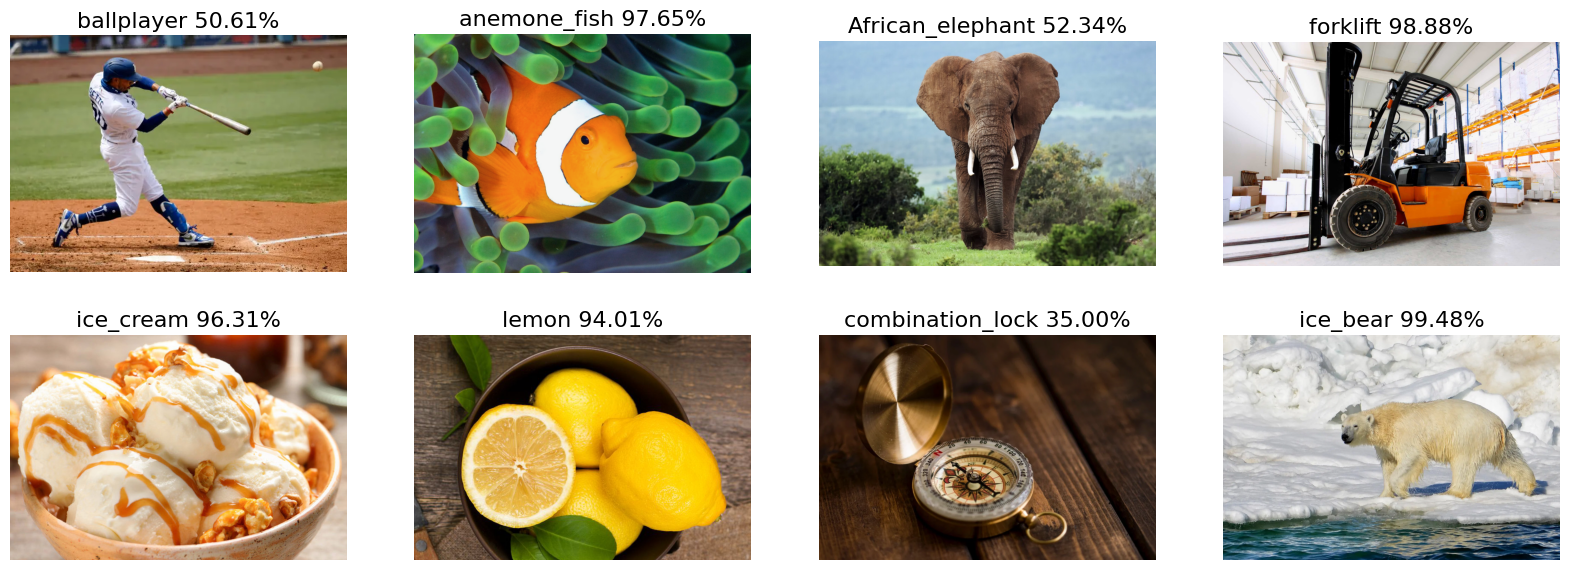

In [12]:
model = model_vgg16
size = (224, 224) 

preprocess_input = tf.keras.applications.vgg16.preprocess_input

process_images(model, image_paths, size, preprocess_input, display_top_k=True, top_k=2)

### 5.2 Resnet-50

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
Top 1 predicted class:   Pr(Class=baseball             [index=   0]) = 80.50
Top 2 predicted class:   Pr(Class=ballplayer           [index=   1]) = 19.50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
Top 1 predicted class:   Pr(Class=anemone_fish         [index=   0]) = 99.59
Top 2 predicted class:   Pr(Class=sea_anemone          [index=   1]) =  0.41
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
Top 1 predicted class:   Pr(Class=African_elephant     [index=   0]) = 58.49
Top 2 predicted class:   Pr(Class=tusker               [index=   1]) = 33.56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
Top 1 predicted class:   Pr(Class=forklift             [index=   0]) = 99.99
Top 2 predicted class:   Pr(Class=snowplow             [index=   1]) =  0.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
Top 1 predicted class:   Pr(Class=ice_cream            [index=   0]) = 99.06
Top 2 predicted class:   Pr(Class=chocolate_sauce      [index=   1]) =  0.60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/s

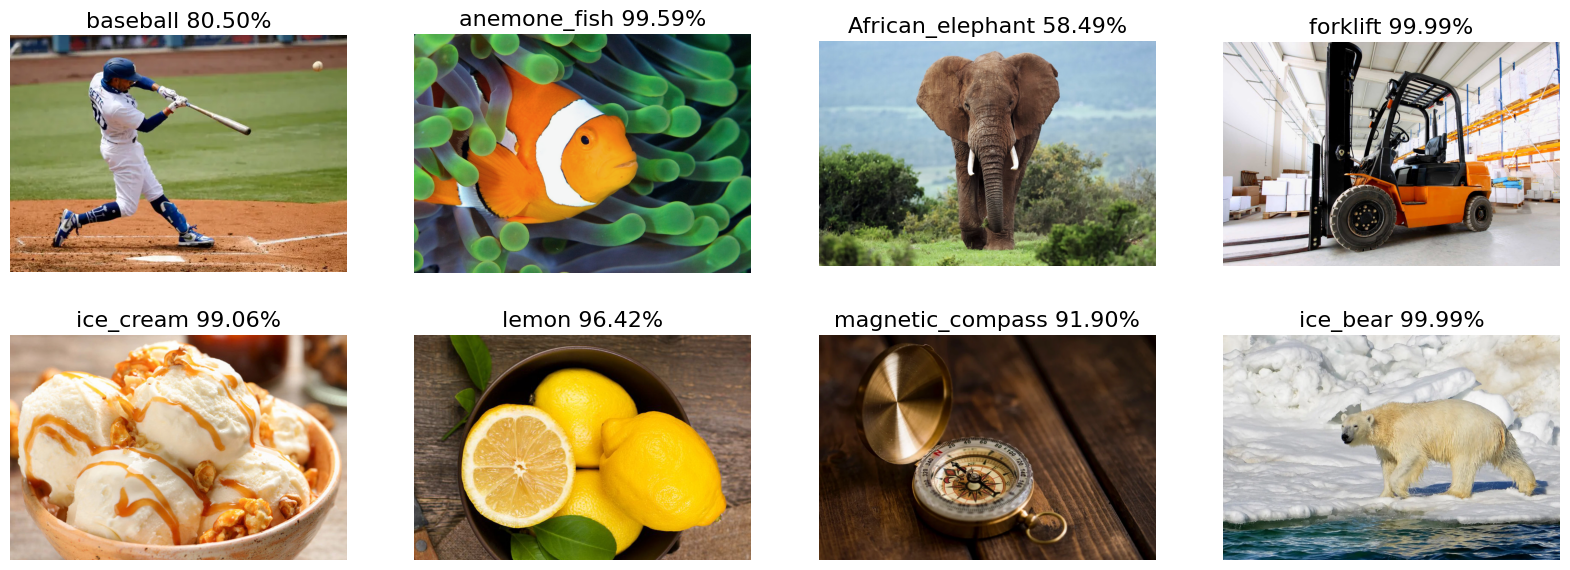

In [14]:
model = model_resnet50
size = (224, 224)

preprocess_input = tf.keras.applications.resnet50.preprocess_input

process_images(model, image_paths, size, preprocess_input, display_top_k=True, top_k=2)

### 5.3 Inception-V3

For this last model, we will use the optional input argument `display_top_k=True` to display the top two predictions for each image.

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Top 1 predicted class:   Pr(Class=ballplayer           [index=   0]) = 69.22
Top 2 predicted class:   Pr(Class=baseball             [index=   1]) = 30.62
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
Top 1 predicted class:   Pr(Class=anemone_fish         [index=   0]) = 92.48
Top 2 predicted class:   Pr(Class=sea_anemone          [index=   1]) =  2.61
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
Top 1 predicted class:   Pr(Class=African_elephant     [index=   0]) = 89.94
Top 2 predicted class:   Pr(Class=tusker               [index=   1]) =  7.94
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
Top 1 predicted class:   Pr(Class=forklift             [index=   0]) = 98.95
Top 2 predicted class:   Pr(Class=golfcart             [index=   1]) =  0.07
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
Top 1 predicted class:   Pr(Class=ice_cream            [index=   0]) = 99.60
Top 2 predicted class:   Pr(Class=cradle               [index=   1]) =  0.08
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step

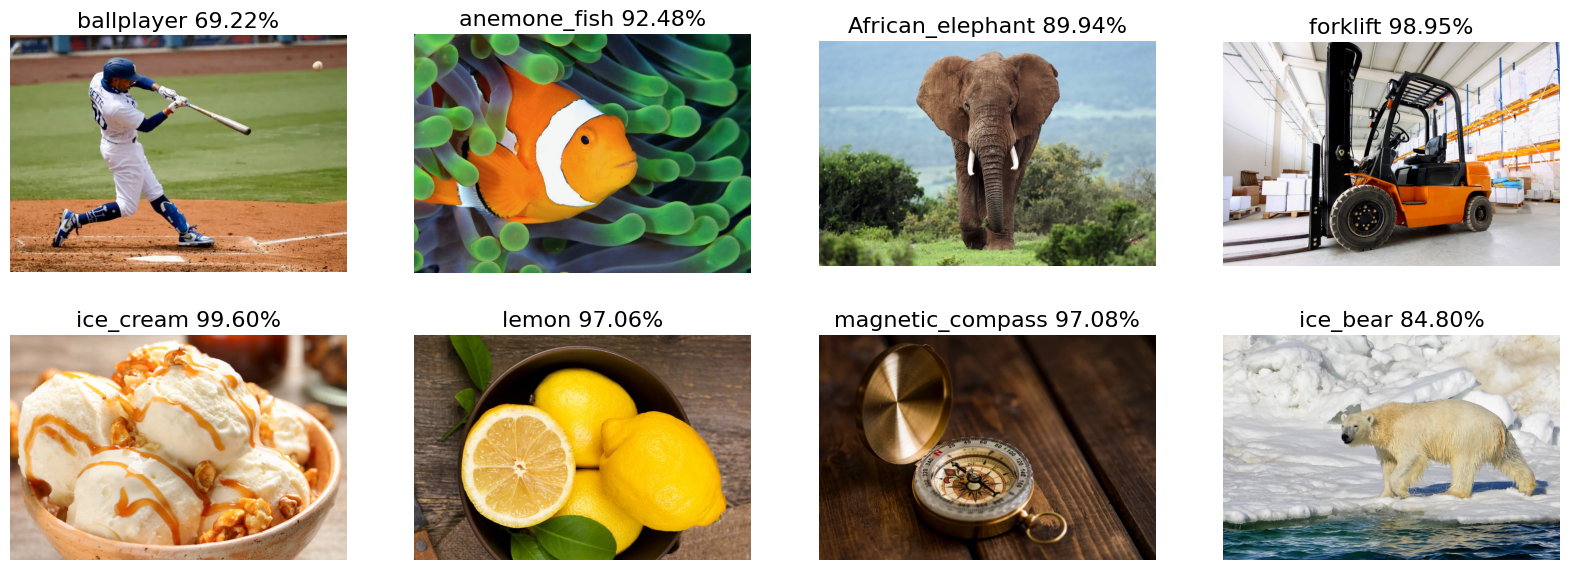

In [15]:
model = model_inception_v3
size = (299, 299)

preprocess_input = tf.keras.applications.inception_v3.preprocess_input

process_images(model, image_paths, size, preprocess_input, display_top_k=True)

Notice that the 2nd most probable class predicted by the model makes a lot of sense in each of the cases shown above. For example, the 2nd choice for the `baseball_player` is `baseball`, and the 2nd choice for `magnetic_compass` is `stop_watch`. Remember, there are 1,000 classes in the ImageNet dataset, and even though these are all very clear and distinct images, many share characteristics with other classes, so these results are quite impressive.


## 6 Conclusion

In this notebook, we learned how to perform image classification using three different pre-trained models in Keras. In a subsequent notebook, you will learn more about leveraging pre-trained models to customize them for a particular application. This is a very common technique called **Transfer Learning**, where we start with a pre-trained model and then re-trained a portion of the model with new images. To make this more concrete, suppose you need to classify object types that do not exist in ImageNet. You can start with a pre-trained ImageNet model and then re-train a portion of the model using training images for the classes you are interested in. We will explore this topic in an upcoming notebook. 

As an experiment, we encourage you to use this notebook to classify your own images and see how the models perform. 

In [16]:
# Store all the image paths in a list.
image_paths = sorted(glob.glob('./my-images/*.jpg'))
print(image_paths)

['./my-images\\banana.jpg', './my-images\\naranja.jpg', './my-images\\parrot.jpg']


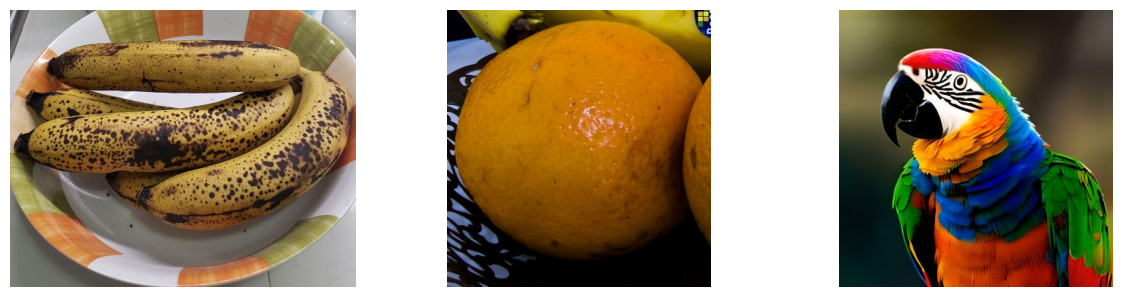

In [17]:
plt.figure(figsize=(16, 6))
for idx, image_path in enumerate(image_paths):
    image = plt.imread(image_path)
    plt.subplot(2,4,idx+1)
    plt.imshow(image)
    plt.axis('off')
    
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
Top 1 predicted class:   Pr(Class=banana               [index=   0]) = 100.00
Top 2 predicted class:   Pr(Class=bagel                [index=   1]) =  0.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
Top 1 predicted class:   Pr(Class=orange               [index=   0]) = 87.03
Top 2 predicted class:   Pr(Class=banana               [index=   1]) =  7.36
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
Top 1 predicted class:   Pr(Class=macaw                [index=   0]) = 83.12
Top 2 predicted class:   Pr(Class=lorikeet             [index=   1]) =  0.90


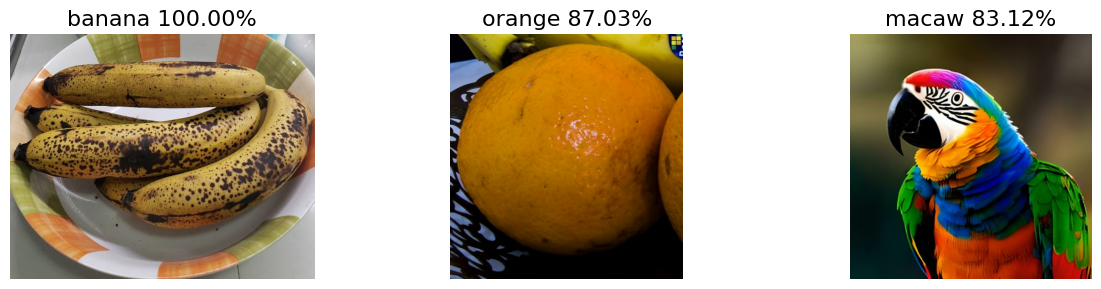

In [18]:
model = model_inception_v3
size = (299, 299)

preprocess_input = tf.keras.applications.inception_v3.preprocess_input

process_images(model, image_paths, size, preprocess_input, display_top_k=True)